**Datenanalyse zum Bike Store**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/Data Analyst/BikeStore.csv")
df.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
#Keine fehlenden Werte.
#Date von Text zu DateTime umwandeln.
#Warum haben wir negative Werte bei z.B. Profit.
#Alle Reihen anzeigen mit negativem Profit.
#

In [6]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Day,113036.0,15.67,8.78,1.0,8.0,16.0,23.0,31.0
Year,113036.0,2014.40,1.27,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,113036.0,35.92,11.02,17.0,28.0,35.0,43.0,87.0
Order_Quantity,113036.0,11.90,9.56,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113036.0,267.30,549.84,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113036.0,452.94,922.07,2.0,5.0,24.0,70.0,3578.0
Profit,113036.0,285.05,453.89,-30.0,29.0,101.0,358.0,15096.0
Cost,113036.0,469.32,884.87,1.0,28.0,108.0,432.0,42978.0
Revenue,113036.0,754.37,1309.09,2.0,63.0,223.0,800.0,58074.0


In [7]:
print(f"Das durchschnittliche Alter der Kunden beträgt {round(df['Customer_Age'].mean(),2)} Jahre")

Das durchschnittliche Alter der Kunden beträgt 35.92 Jahre


In [8]:
df_duplicates = df.duplicated().sum()
df_duplicates

1000

In [9]:
df.groupby("Age_Group").value_counts()

Age_Group       Date        Day  Month     Year  Customer_Age  Customer_Gender  Country        State             Product_Category  Sub_Category       Product                 Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue
Adults (35-64)  2015-11-19  19   November  2015  41            M                United States  California        Accessories       Tires and Tubes    Patch Kit/8 Patches     18              1          2           17      18    35         3
                2014-03-17  17   March     2014  35            M                Canada         British Columbia  Accessories       Bottles and Cages  Water Bottle - 30 oz.   15              2          5           44      30    74         3
                2015-11-24  24   November  2015  41            M                United States  California        Accessories       Tires and Tubes    Patch Kit/8 Patches     8               1          2           8       8     16         3
                2014-02-17  17   February  20

**Altersverteilung der Kunden**

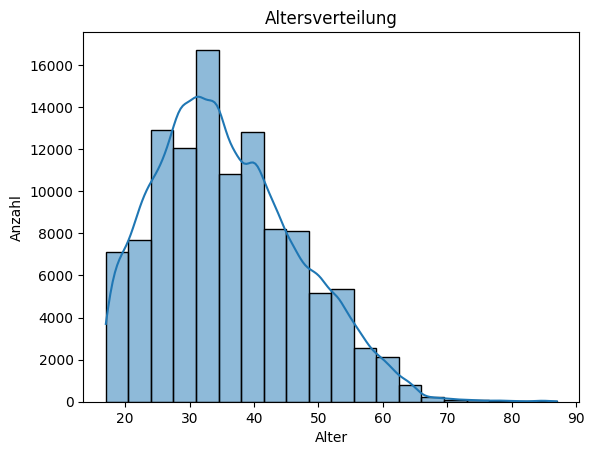

In [10]:
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Altersverteilung')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.show()

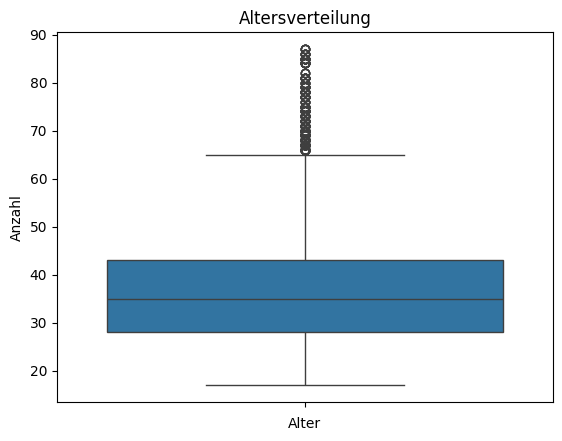

In [11]:
sns.boxplot(df['Customer_Age'])
plt.title('Altersverteilung')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.show()

In [12]:
country = df["Country"].value_counts()
country

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

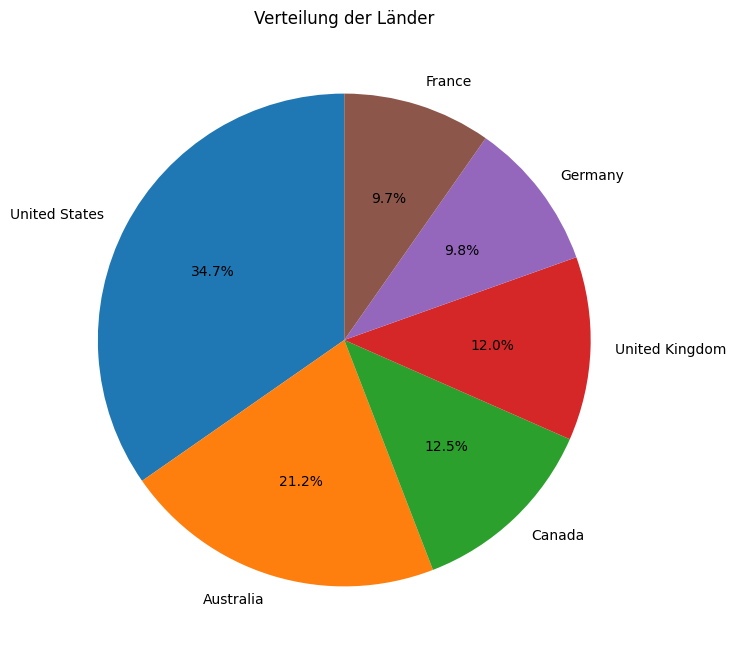

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(country, labels=country.index, autopct='%1.1f%%', startangle=90)
plt.title('Verteilung der Länder')
plt.show()

In [14]:
categorys = df["Sub_Category"].value_counts()
categorys

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

Produkt mit der höchsten Revenue.


In [15]:
df.groupby("Product")["Revenue"].sum().idxmax()

'Road-150 Red, 62'

Die Verteilung der Geschlechter entspricht rund 50 / 50.


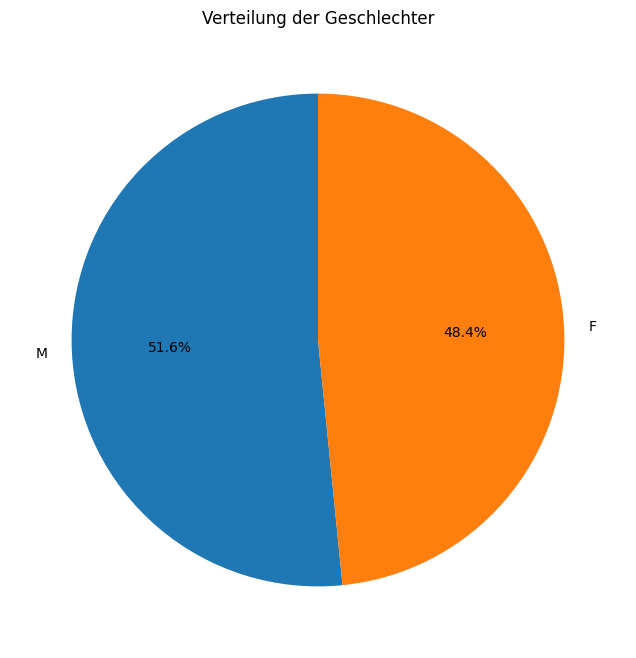

In [16]:
gender = df["Customer_Gender"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Verteilung der Geschlechter')
plt.show()

In [17]:
df.groupby("Customer_Gender")["Age_Group"].value_counts()

Customer_Gender  Age_Group           
F                Adults (35-64)          27500
                 Young Adults (25-34)    18724
                 Youth (<25)              8166
                 Seniors (64+)             334
M                Adults (35-64)          28324
                 Young Adults (25-34)    19930
                 Youth (<25)              9662
                 Seniors (64+)             396
Name: count, dtype: int64

In [18]:
category_revenue = df.groupby("Product_Category")["Revenue"].sum()
category_revenue

Product_Category
Accessories    15117992
Bikes          61782134
Clothing        8370882
Name: Revenue, dtype: int64

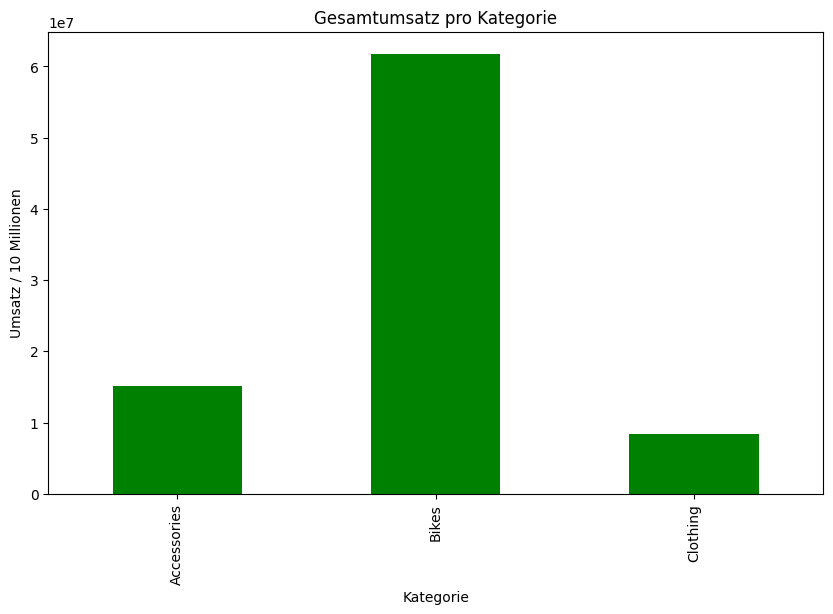

In [19]:
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='green')
plt.title('Gesamtumsatz pro Kategorie')
plt.xlabel('Kategorie')
plt.ylabel('Umsatz / 10 Millionen')
plt.show()


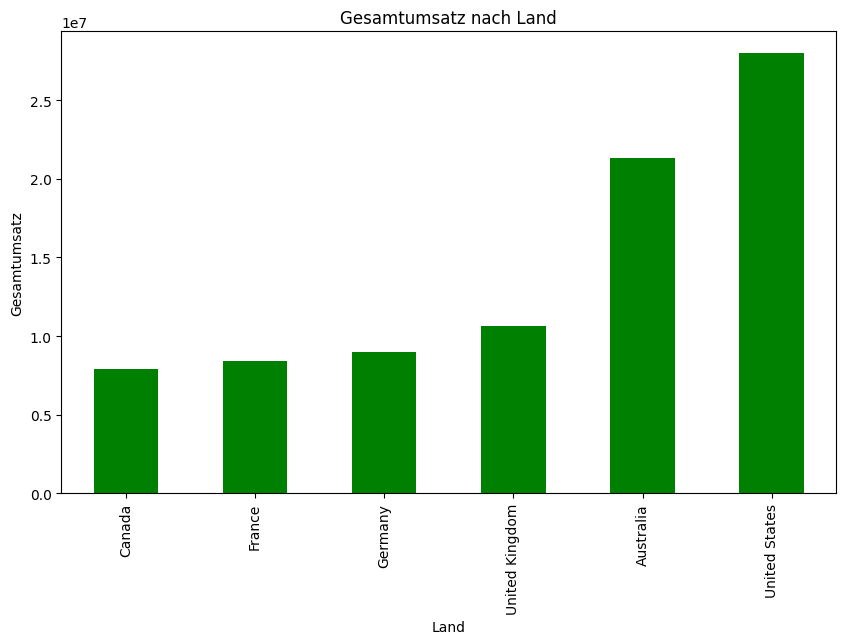

In [20]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values()
plt.figure(figsize=(10, 6))
country_revenue.plot(kind='bar', color='green')
plt.title('Gesamtumsatz nach Land')
plt.xlabel('Land')
plt.ylabel('Gesamtumsatz')
plt.show()

In [21]:
df.groupby("Customer_Gender")["Product_Category"].value_counts()# Geschlecht hat keine Auswirkungen auf die gekaufte Kategorie

Customer_Gender  Product_Category
F                Accessories         33844
                 Bikes               12852
                 Clothing             8028
M                Accessories         36276
                 Bikes               13130
                 Clothing             8906
Name: count, dtype: int64

In [22]:
monthly_revenue = df.groupby("Month")["Revenue"].sum()

In [25]:
years_revenue = df.groupby("Year")["Revenue"].sum().sort_values()
years_revenue

Year
2011     8964888
2012     9175983
2014    14152724
2013    15240037
2016    17713385
2015    20023991
Name: Revenue, dtype: int64

**Balkendiagramm für Jahresumsatz**

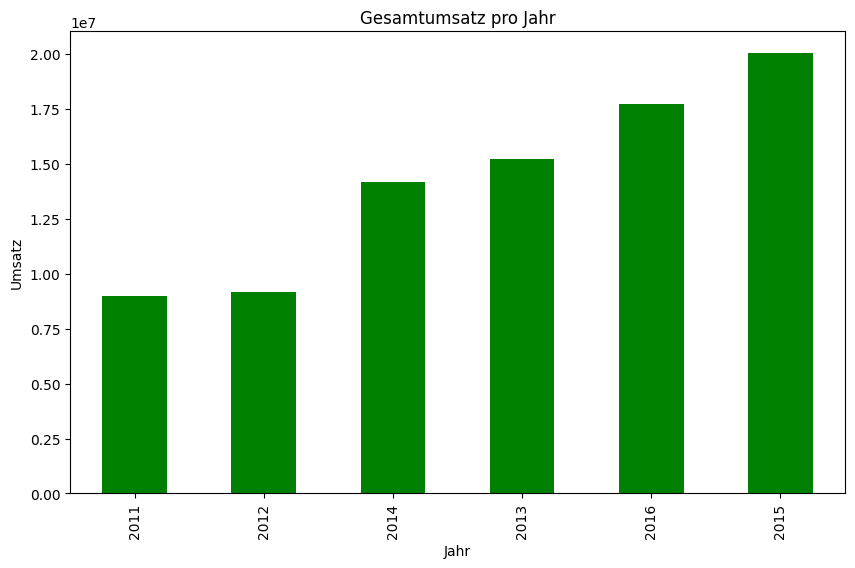

In [26]:
plt.figure(figsize=(10, 6))
years_revenue.plot(kind='bar', color='green')
plt.title('Gesamtumsatz pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Umsatz')
plt.show()

In [ ]:
pivot = df.pivot_table(index="Date" , columns="Age_Group",values="Revenue",aggfunc="sum").fillna(0)
pivot

Age_Group,Adults (35-64),Seniors (64+),Young Adults (25-34),Youth (<25)
Date,,,,
2011-01-01,3150.0,0.0,5439.0,4232.0
2011-01-02,10793.0,0.0,1075.0,0.0
2011-01-03,20088.0,0.0,11087.0,0.0
2011-01-04,6073.0,0.0,12836.0,0.0
2011-01-05,3093.0,0.0,1582.0,0.0
...,...,...,...,...
2016-07-27,6572.0,0.0,4234.0,3288.0
2016-07-28,13745.0,0.0,4529.0,828.0
2016-07-29,11509.0,0.0,2134.0,5686.0
